In [38]:
import matplotlib.pyplot as plt

from bandits import average_finder
from strategies import *

In [39]:
machine_no = 100
trial_no = 20000
gaussian = True
number_of_iterations = 5


In [40]:
numbers_to_try = [0.5,1,1.5,2]

In [41]:
ucb1 = []
ucb2 = []
ucb_3 = []
ucb_4 = []
strategy_list = ["1", "2", "3", "4"]

In [42]:
for i in range(number_of_iterations):
    ucb1.append(
        ucb_strategy(machine_no, trial_no, confidence_level=numbers_to_try[0],
                     gaussian=gaussian).regret)
    ucb2.append(
        ucb_strategy(machine_no, trial_no, confidence_level=numbers_to_try[1],
                     gaussian=gaussian).regret)
    ucb_3.append(
        ucb_strategy(machine_no, trial_no, confidence_level=numbers_to_try[2],
                     gaussian=gaussian).regret)
    ucb_4.append(ucb_strategy(machine_no, trial_no, confidence_level=numbers_to_try[3],
                              gaussian=gaussian).regret)

In [43]:
ucb1_average = average_finder(ucb1, trial_no,
                              number_of_iterations)
ucb2_average = average_finder(ucb2, trial_no,
                              number_of_iterations)
ucb3_average = average_finder(ucb_3, trial_no,
                              number_of_iterations)
ucb4_average = average_finder(ucb_4, trial_no, number_of_iterations)

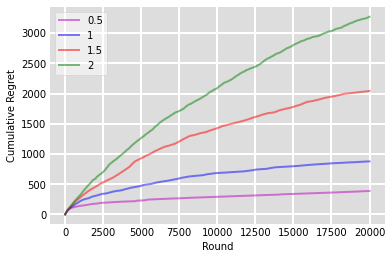

In [44]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(range(len(ucb1_average)), ucb1_average, 'm', alpha=0.5, lw=2,
        label=str(numbers_to_try[0]))
ax.plot(range(len(ucb2_average)), ucb2_average, 'b', alpha=0.5, lw=2,
        label=str(numbers_to_try[1]))
ax.plot(range(len(ucb3_average)), ucb3_average, 'r', alpha=0.5, lw=2,
        label=str(numbers_to_try[2]))
ax.plot(range(len(ucb4_average)), ucb4_average, 'g', alpha=0.5, lw=2,
        label=str(numbers_to_try[3]))
ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both', c='w', lw=2, ls='-')
# plt.title("")
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('ucb_plot.png', dpi=1000, transparent=False, bbox_inches='tight')
plt.show()